In [32]:
import pandas as pd

In [33]:
df=pd.read_csv('breast_cancer_data (1).csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [34]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [35]:
df.drop('Unnamed: 32',axis=1,inplace=True)

In [36]:
df.drop('id',axis=1,inplace=True)

In [37]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [40]:
df['diagnosis-enc'] = df['diagnosis'].map({'M':1, 'B':0})

In [41]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

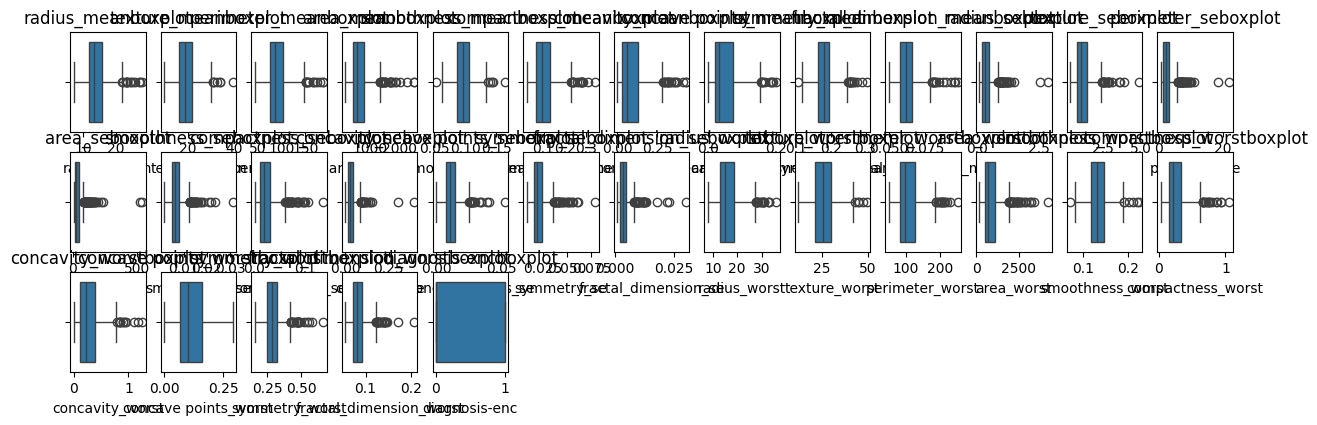

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
num_cols=df.select_dtypes("number").columns
plt.figure(figsize=(15,20))
for i,col in enumerate(num_cols):
  plt.subplot(13,13,i+1)
  sns.boxplot(df[col],orient='h')
  plt.title(f"{col}boxplot")
plt.show()

In [43]:
num_cols = df.select_dtypes("number").columns

for col in num_cols:
  q1=df[col].quantile(0.25)
  q3=df[col].quantile(0.75)
  iqr=q3-q1
  upper_fence=q3+1.5*iqr
  lower_fence=q1-1.5*iqr
  lower_outliers=df[df[col]<lower_fence][col].values
  upper_outliers=df[df[col]>upper_fence][col].values
  df[col].replace(lower_outliers,lower_fence,inplace=True)
  df[col].replace(upper_outliers,upper_fence,inplace=True)

C:\Users\Incorta\AppData\Local\Temp\ipykernel_4232\3329675215.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(lower_outliers,lower_fence,inplace=True)
C:\Users\Incorta\AppData\Local\Temp\ipykernel_4232\3329675215.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

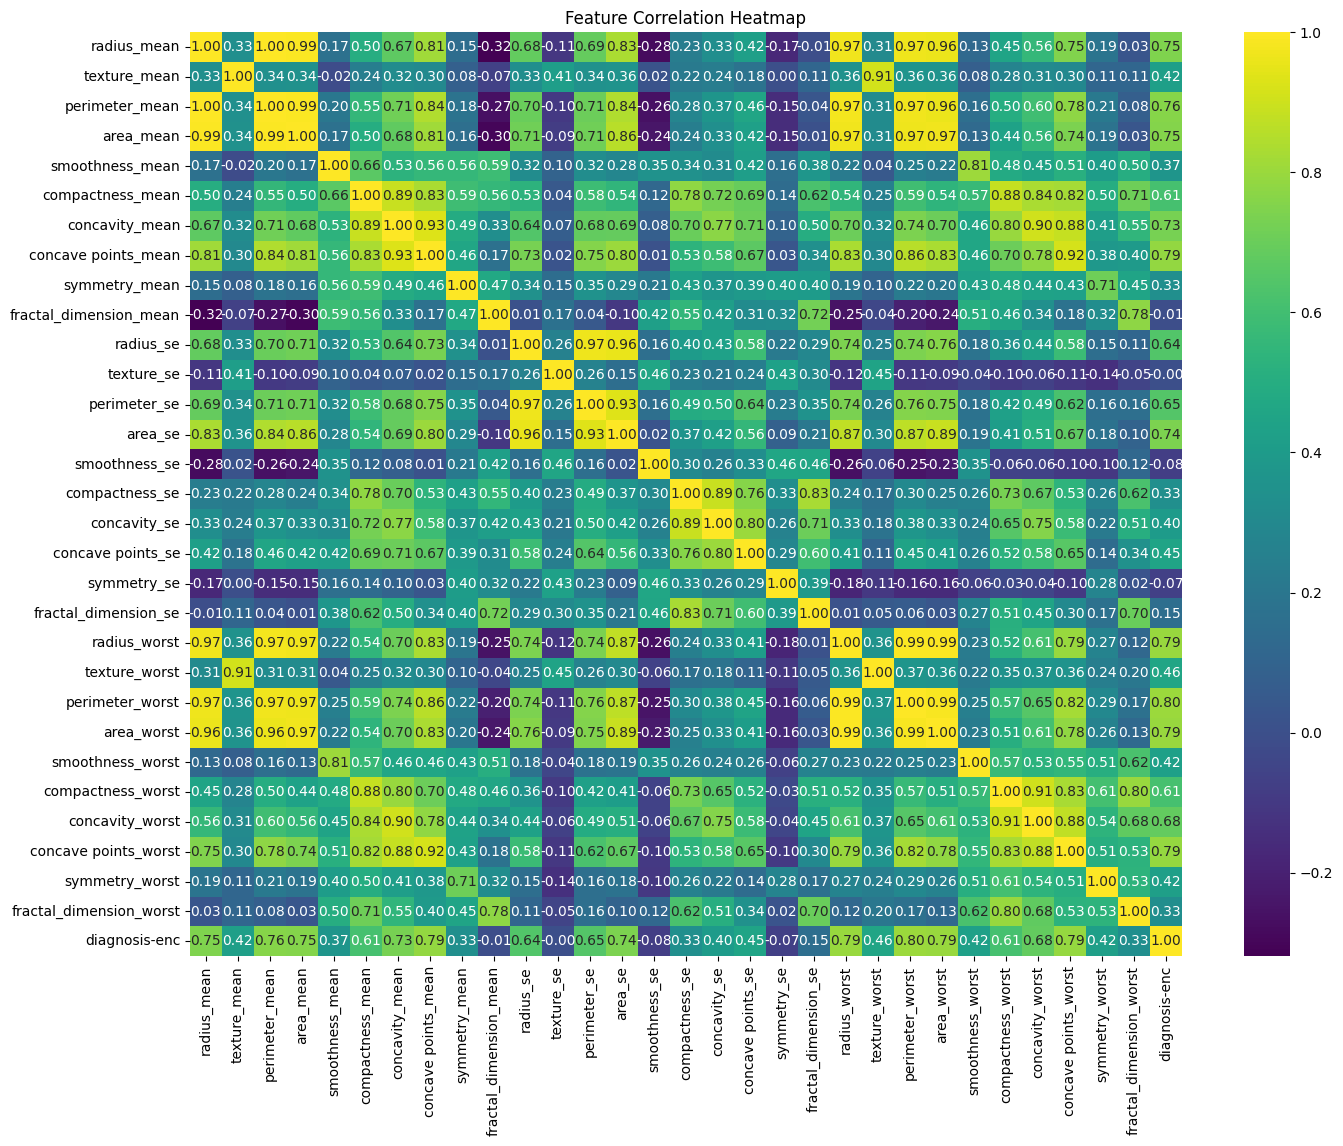

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
df_for_corr = df.drop(["diagnosis"], axis=1)

plt.figure(figsize=(16,12))
sns.heatmap(df_for_corr.corr(), cmap='viridis', annot=True, fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn .ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [46]:
#normalize numerical columns
from sklearn.preprocessing import MinMaxScaler
num_cols=df.select_dtypes('number').columns
scaler=MinMaxScaler()
scaler.fit(df[num_cols])
df[num_cols]=scaler.transform(df[num_cols])
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis-enc
0,M,0.737918,0.032627,0.761873,0.724975,0.798006,1.000000,1.000000,0.951888,0.966716,...,0.173190,0.980026,1.000000,0.762755,1.000000,0.906302,0.912027,1.000000,0.939532,1.0
1,M,0.910852,0.392501,0.859264,0.999746,0.353473,0.283215,0.307709,0.454072,0.517751,...,0.371494,0.791601,1.000000,0.436224,0.265667,0.307575,0.639175,0.451171,0.499926,1.0
2,M,0.851867,0.561967,0.831300,0.895756,0.681788,0.671573,0.698984,0.827644,0.707840,...,0.440639,0.745591,0.869823,0.611395,0.662392,0.573393,0.835052,0.779745,0.478741,1.0
3,M,0.297540,0.519601,0.325828,0.205107,1.000000,1.000000,0.854786,0.680752,1.000000,...,0.472277,0.353916,0.218341,1.000000,1.000000,0.874475,0.884880,1.000000,1.000000,1.0
4,M,0.892084,0.225469,0.880478,0.975228,0.558967,0.542057,0.701108,0.674928,0.515533,...,0.151663,0.743400,0.793333,0.551871,0.296351,0.509230,0.558419,0.304207,0.319847,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,0.977210,0.617482,0.947013,1.000000,0.700277,0.461288,0.863638,0.898826,0.454142,...,0.469015,0.844915,1.000000,0.582483,0.306857,0.522852,0.761512,0.188464,0.237016,1.0
565,M,0.881359,0.902849,0.842872,0.944792,0.525951,0.401548,0.509897,0.633578,0.473373,...,0.855512,0.763849,0.882381,0.375000,0.275006,0.409293,0.559450,0.383400,0.166691,1.0
566,M,0.644748,0.894570,0.622053,0.604160,0.350964,0.396291,0.327573,0.343094,0.353550,...,0.720809,0.557166,0.535891,0.352041,0.470450,0.433227,0.487285,0.248620,0.340739,1.0
567,M,0.912863,0.955442,0.928692,0.948174,0.790082,1.000000,1.000000,0.983596,0.950444,...,0.893673,0.980026,0.933756,0.786565,1.000000,1.000000,0.910653,0.960213,1.000000,1.0


In [47]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [49]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
y_pred=model.predict(X_test)

In [51]:
print(f"Decision Tree Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           B       1.00      1.00      1.00        71
           M       1.00      1.00      1.00        43

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



In [52]:
# 80% for training, 20% for testing, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model with max_depth and max_features
rf = RandomForestClassifier(n_estimators=10, max_depth=5, max_features='sqrt', random_state=42)
rf.fit(X_train, y_train)

# Make predictions on both training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate and print the accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy : {test_accuracy:.4f}")

Training Accuracy: 1.0000
Testing Accuracy : 1.0000
